In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io

In [2]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_rel, ttest_1samp

In [3]:
def check_stats_significance(p_value, threshold=0.05):
    if p_value < threshold:
        return f'{p_value:.4f} < {threshold:.2f}: Reject the null hypothesis H0; the result statistically significant'
    else:
        return f'{p_value:.4f} >= {threshold:.2f}: Failed to reject the null hypothesis H0; the result not statistically significant'

#### Data

In [4]:
# source: https://cran.r-project.org/web/packages/PairedData/PairedData.pdf

# Anorexia Anorexia data from Pruzek & Helmreich (2009)
# Description
# This dataset presents 17 paired data corresponding to the weights of girls
# before and after treatment for anorexia. A more complete version can be
# found in the package MASS. There is actually a cluster of four points in
# this dataset.

data = '''Prior  Post
83.8  95.2
83.3  94.3
86.0  91.5
82.5  91.9
86.7 100.3
79.6  76.7
76.9  76.8
94.2 101.6
73.4  94.9
80.5  75.2
81.6  77.8
82.1  95.5
77.6  90.7
83.5  92.5
89.9  93.8
86.0  91.7
87.3  98.0'''

file = io.StringIO(data)
df = pd.read_csv(file, delim_whitespace=True)

df.head()

,Prior,Post
0,83.8,95.2
1,83.3,94.3
2,86.0,91.5
3,82.5,91.9
4,86.7,100.3


In [5]:
# data
x1 = df['Prior'].to_numpy()
x2 = df['Post'].to_numpy()

#### Visualize

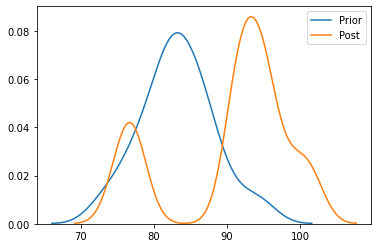

In [6]:
sns.kdeplot(x1, label='Prior')
sns.kdeplot(x2, label='Post')
plt.legend();

# 1. Paired Samples Test


## 1.1 Paired Samples z-test

#### 2-sided
- $H_0$: $\mu_1 = \mu_2$
- $H_1$: $\mu_1 \neq \mu_2$

In [7]:
d = x2 - x1
test_statistic, p_value = ztest(d)

print(p_value)
print(check_stats_significance(p_value))

2.852814483270682e-05
0.0000 < 0.05: Reject the null hypothesis H0; the result statistically significant


#### 1-sided
- $H_0$: $\mu_1 \leq \mu_2$
- $H_1$: $\mu_1 > \mu_2$

In [8]:
d = x2 - x1
test_statistic, p_value = ztest(d, alternative='larger')

print(p_value)
print(check_stats_significance(p_value))

1.426407241635341e-05
0.0000 < 0.05: Reject the null hypothesis H0; the result statistically significant


## 1.2 Paired Samples t-test

#### 2-sided
- $H_0$: $\mu_1 = \mu_2$
- $H_1$: $\mu_1 \neq \mu_2$

In [9]:
# Method 1: Use ttest_rel
test_statistic, p_value = ttest_rel(x1, x2)

print(p_value)
print(check_stats_significance(p_value))

0.0007002531056005393
0.0007 < 0.05: Reject the null hypothesis H0; the result statistically significant


In [10]:
# Method 2: Use ttest_1samp on d
d = x2 - x1
test_statistic, p_value = ttest_1samp(d, popmean=0)

print(p_value)
print(check_stats_significance(p_value))

0.0007002531056005393
0.0007 < 0.05: Reject the null hypothesis H0; the result statistically significant


#### 1-sided
- $H_0$: $\mu_1 \leq \mu_2$
- $H_1$: $\mu_1 > \mu_2$

In [11]:
# Method 1: Use ttest_rel
test_statistic, res = ttest_rel(x1, x2)
p_value = res/2

print(p_value)
print(check_stats_significance(p_value))

0.00035012655280026967
0.0004 < 0.05: Reject the null hypothesis H0; the result statistically significant


In [12]:
# Method 2: Use ttest_1samp on d
d = x2 - x1
test_statistic, res = ttest_1samp(d, popmean=0)
p_value = res/2

print(p_value)
print(check_stats_significance(p_value))

0.00035012655280026967
0.0004 < 0.05: Reject the null hypothesis H0; the result statistically significant


# 2. Sign Test

In [13]:
d = x2 - x1

signs = np.sign(d)
signs

array([ 1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [14]:
N = len(signs)
N_positive = np.sum(signs > 0)
N_negative = np.sum(signs < 0)

print(N, N_positive, N_negative)

17 13 4


## 2.1 2-sided
- $H_0$: $\mu_1 = \mu_2$
- $H_1$: $\mu_1 \neq \mu_2$

#### API

In [15]:
from statsmodels.stats.descriptivestats import sign_test

test_statistic, p_value = sign_test(signs)

print(p_value)
print(check_stats_significance(p_value))

0.049041748046874986
0.0490 < 0.05: Reject the null hypothesis H0; the result statistically significant


#### Implement

In [16]:
from scipy.stats import binom

k = min(N_positive, N_negative)
p_left = binom.cdf(k, n=N, p=0.5)
p_value = 2*p_left

print(p_value)
print(check_stats_significance(p_value))

0.049041748046874986
0.0490 < 0.05: Reject the null hypothesis H0; the result statistically significant
